In [2]:
#Исследуйте зависимость пользования предложением от идентификатора клиента.

In [35]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
import datetime as d

In [36]:
df = pd.read_csv('Домашнее задание Бизнес-4 (исходник).csv',sep=';') 
df

,id_client,flag_conv
0,1345321,0
1,1345322,0
2,1345330,0
3,1345338,1
4,1345342,0
...,...,...
3164,1361073,1
3165,1361074,1
3166,1361082,1
3167,1361083,1


In [37]:
df['last_symbol'] = df['id_client'].astype(str).str[-1]
df

,id_client,flag_conv,last_symbol
0,1345321,0,1
1,1345322,0,2
2,1345330,0,0
3,1345338,1,8
4,1345342,0,2
...,...,...,...
3164,1361073,1,3
3165,1361074,1,4
3166,1361082,1,2
3167,1361083,1,3


In [38]:
df_group=df.groupby('last_symbol').mean()['flag_conv'].reset_index()

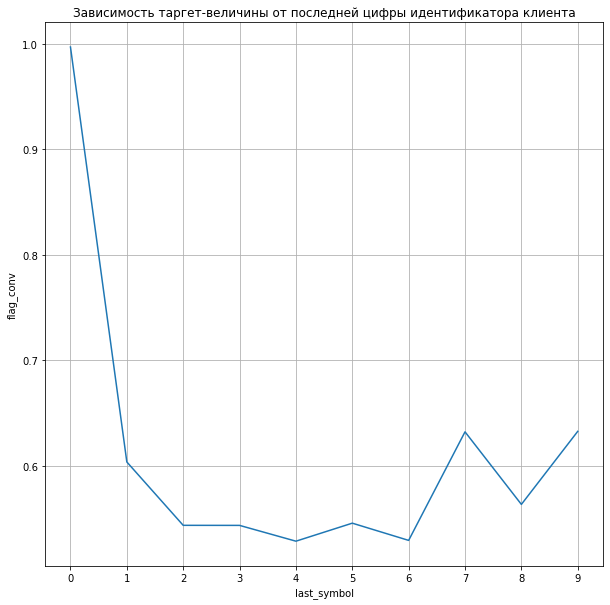

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

plt.title('Зависимость таргет-величины от последней цифры идентификатора клиента')
plt.xlabel('last_symbol')
plt.ylabel('flag_conv')

plt.grid()
plt.plot(df_group.last_symbol,df_group.flag_conv)

In [40]:
#Сделайте разбиение клиентов по группам (контроль и тест) в зависимости от остатка деления идентификатора на 10. 
#Рассчитайте результаты АА-теста. Наблюдается ли разница?

In [49]:
df['id_group_10']=np.where(df['id_client']%10<5,1,0)

In [50]:
print(df.groupby('id_group_10').count()['id_client'].reset_index())
print(df.groupby('id_group_10').mean()['flag_conv'].reset_index())

   id_group_10  id_client
0            0       1609
1            1       1560
   id_group_10  flag_conv
0            0   0.579863
1            1   0.644872


In [54]:
s, p = ttest_ind(df[df['id_group_10']==1]['flag_conv'],df[df['id_group_10']==0]['flag_conv'])
print(s)
print(p)

3.761500955083385
0.00017195329628373794


In [55]:
#Сделайте разбиение клиентов по группам (контроль и тест) в зависимости от четности идентификатора (остатка от деления идентификатора на 2). 
#Рассчитайте результаты АА-теста.

In [56]:
df['id_group_2']=np.where(df['id_client']%2==0,1,0)

In [57]:
print(df.groupby('id_group_2').count()['id_client'].reset_index())
print(df.groupby('id_group_2').mean()['flag_conv'].reset_index())

   id_group_2  id_client
0           0       1583
1           1       1586
   id_group_2  flag_conv
0           0   0.591914
1           1   0.631778


In [58]:
s, p = ttest_ind(df[df['id_group_2']==1]['flag_conv'],df[df['id_group_2']==0]['flag_conv'])
print(s)
print(p)

2.303661902563631
0.021306090686166332


In [ ]:
#Сделайте разбиение клиентов по группам (контроль и тест) с помощью функции sample из библиотеки pandas. 
#По аналогии с расчетом из лекции сделайте 1000 разбиений с помощью sample и рассчитайте статистическую значимость разниц. 
#В скольких процентах случаев наблюдается статистически значимая разница между контролем и тестом в АА-тесте?

In [60]:
df_aa = pd.DataFrame(columns=['iter','stat_crit','p_value'])

for i in range(1,1000):
    part_50 = df.sample(frac = 0.5)
    rest_part_50 = df.drop(part_50.index)

    s_a, p_a = ttest_ind(part_50['flag_conv'], rest_part_50['flag_conv'])
    
    df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\Xenia\AppData\Local\Temp\ipykernel_2900\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from p

In [61]:
df_aa[df_aa['p_value']<=0.05].count() /df_aa.count()  

iter         0.057057
stat_crit    0.057057
p_value      0.057057
dtype: float64

In [ ]:
#Рассчитайте, сколько наблюдений потребуется для проведения АБ Теста, при условии что MDE = 2 процентных пункта 
#(предположите, что альфа и бета установлены на дефолтном уровне и что дисперсия выборки не изменится от воздействия В).

In [62]:
a=df['flag_conv'].mean()
sigma=a*(1-a)
print(a)
print(sigma)

0.6118649416219628
0.23748623483591486


In [64]:
b=16*sigma**2/(0.02**2)
print(b)

2255.988469461572
